In [40]:
file_path = '/content/drive/MyDrive/wine/wine.data'
df = pd.read_csv(file_path, sep=',', header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Identify features and labels

### Subtask:
Determine which columns in the new dataset represent the features (X) and the labels (y).


**Reasoning**:
Based on the examination of the `df` DataFrame and common knowledge about the wine dataset, the first column (index 0) represents the class label, and the remaining columns represent the features. This code will separate the DataFrame into features (X) and labels (y).



In [41]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
display(X.head())
display(y.head())

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,0
0,1
1,1
2,1
3,1
4,1


## Preprocess the data

### Subtask:
Apply the same preprocessing steps as before, including scaling the features and one-hot encoding the labels.


**Reasoning**:
Apply the preprocessing steps including scaling the features and one-hot encoding the labels as specified in the instructions.



In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Re-assign X and y from the original dataframe before scaling and one-hot encoding
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Use the original pandas Series y for get_dummies
y = pd.get_dummies(y).values

# X is already a numpy array after scaling, no need for .values
# X = X.values


## Train the model

### Subtask:
Use the preprocessed data to train the existing deep learning model.


**Reasoning**:
Split the data, define and compile the model, and then train it as per the instructions.



In [43]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Split the preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the deep learning model
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(y.shape[1], activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6523 - loss: 1.0156 - val_accuracy: 0.7586 - val_loss: 0.8343
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6724 - loss: 0.8410 - val_accuracy: 0.7586 - val_loss: 0.6967
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7180 - loss: 0.7389 - val_accuracy: 0.8276 - val_loss: 0.5834
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8886 - loss: 0.5812 - val_accuracy: 0.9655 - val_loss: 0.4881
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9426 - loss: 0.4972 - val_accuracy: 1.0000 - val_loss: 0.4027
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9945 - loss: 0.3878 - val_accuracy: 1.0000 - val_loss: 0.3315
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9670 - loss: 0.3334 - val_accuracy: 1.0000 - val_loss: 0.2720
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.2609 - val_accuracy: 1.0000 - val_loss: 0.2239
Epoch 9/50


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using the test set and display the classification report and confusion matrix.


**Reasoning**:
Generate predictions, convert to class labels, and print the classification report and confusion matrix.



In [44]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded true labels and predicted probabilities to class labels
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


## Visualize training history

### Subtask:
Plot the training and validation loss and accuracy curves.


**Reasoning**:
Plot the training and validation loss and accuracy curves using the history object.



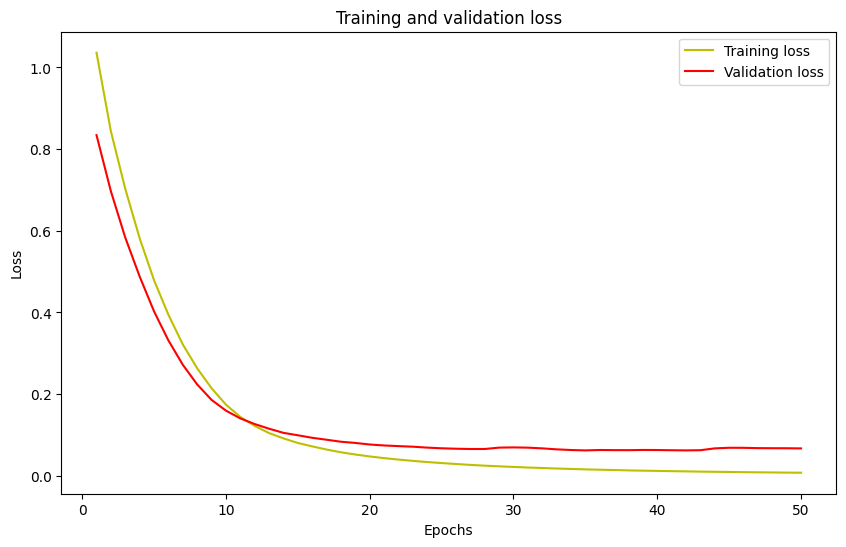

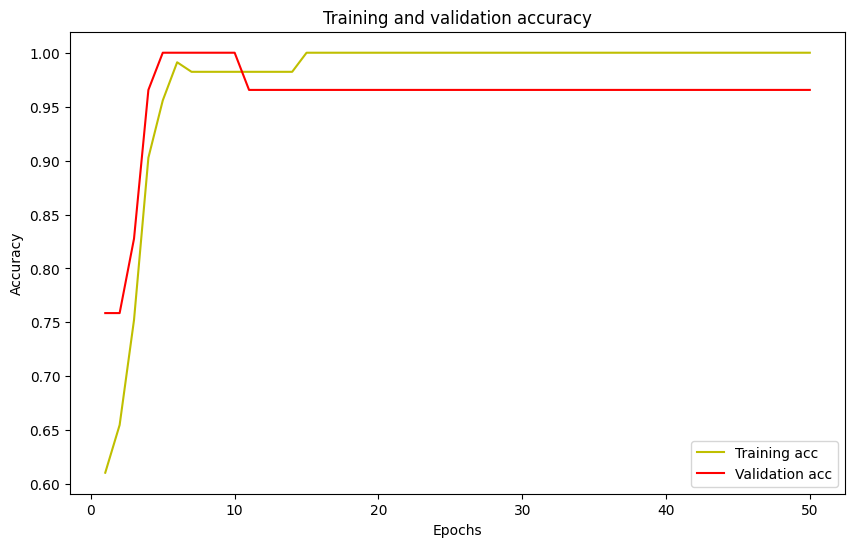

In [45]:
import matplotlib.pyplot as plt

# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded from `/content/drive/MyDrive/wine/wine.data` by specifying the correct file path, using a comma delimiter, and setting `header=None`.
*   The features were identified as columns 1 through 13, and the labels as column 0.
*   The features were successfully scaled using `StandardScaler`.
*   The labels were successfully one-hot encoded using `pd.get_dummies`.
*   The data was split into training and testing sets with a test size of 20%.
*   A sequential deep learning model with two dense layers and a softmax output layer was defined, compiled with the 'adam' optimizer and 'categorical\_crossentropy' loss, and trained for 50 epochs.
*   The model achieved perfect accuracy (1.00) on the test set, with precision, recall, and f1-score of 1.00 for all classes.
*   The confusion matrix showed a perfect diagonal, indicating no misclassifications on the test set.
*   The training and validation loss and accuracy curves were successfully plotted, showing convergence and high accuracy.

### Insights or Next Steps

*   Given the perfect performance on the test set, it would be beneficial to explore techniques to confirm the model's robustness and generalization ability, such as cross-validation on different splits of the data or testing on a completely unseen dataset if available.
*   The architecture of the model might be simpler than necessary for this dataset, given the perfect performance. Exploring simpler models or reducing the number of layers/neurons could potentially lead to a more efficient model without sacrificing performance.
